In [1]:
# Importing the required packages here
import numpy as np
import pandas as pd

# missing values
import missingno

# ploting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set the seaborn plot theme
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('automobile.txt')

In [3]:
# check the number of columns
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# 1. Drop redundant columns 

In [5]:
# function to delete columns
def column_drop(dframe, column):
    return dframe.drop(column, axis = 1, inplace = True)

# list of columns to drop
columns_to_drop = ['symboling', 'engine-location', 'fuel-system', 'bore', 'stroke', 
                   'length', 'width', 'height']

# loop to iterate through the list of columns to drop in place
for item in columns_to_drop:
    column_drop(dframe = df, column = item)

In [6]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,9.0,111,5000,21,27,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,9.0,111,5000,21,27,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,94.5,2823,ohcv,six,152,9.0,154,5000,19,26,16500
3,164,audi,gas,std,four,sedan,fwd,99.8,2337,ohc,four,109,10.0,102,5500,24,30,13950
4,164,audi,gas,std,four,sedan,4wd,99.4,2824,ohc,five,136,8.0,115,5500,18,22,17450


# 2. Check duplicates

In [7]:
# Get the list of column names so I can copy and paste instead of typing them all out
list1 = list(df)
print(list1)

['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'wheel-base', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [8]:
headings = ['normalized-losses','make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'wheel-base',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg','price']

In [9]:
# check which rows are duplicated
df[headings].duplicated().sum()

0

So taking a closer look at the first two rows i noticed that the only difference is the price

In [10]:
df.head(2)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,9.0,111,5000,21,27,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,9.0,111,5000,21,27,16500


So after removing "price" from the argument, I found that there were 7 duplicated rows

In [11]:
headings2 = ['normalized-losses','make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'wheel-base',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']

In [12]:
# check which rows are duplicated
df[headings2].duplicated().sum()

7

In [13]:
df.drop_duplicates(subset=headings2, inplace=True)

In [14]:
# check which rows are duplicated
df[headings2].duplicated().sum()

0

# 3. Dealing with missing or data irregularities (?, 0, empty spaces)

In [15]:
df = df.replace('?', np.nan)

In [16]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,9.0,111,5000,21,27,13495
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,94.5,2823,ohcv,six,152,9.0,154,5000,19,26,16500
3,164,audi,gas,std,four,sedan,fwd,99.8,2337,ohc,four,109,10.0,102,5500,24,30,13950
4,164,audi,gas,std,four,sedan,4wd,99.4,2824,ohc,five,136,8.0,115,5500,18,22,17450
5,NaN,audi,gas,std,two,sedan,fwd,99.8,2507,ohc,five,136,8.5,110,5500,19,25,15250


# 4. Check missing data

<AxesSubplot:>

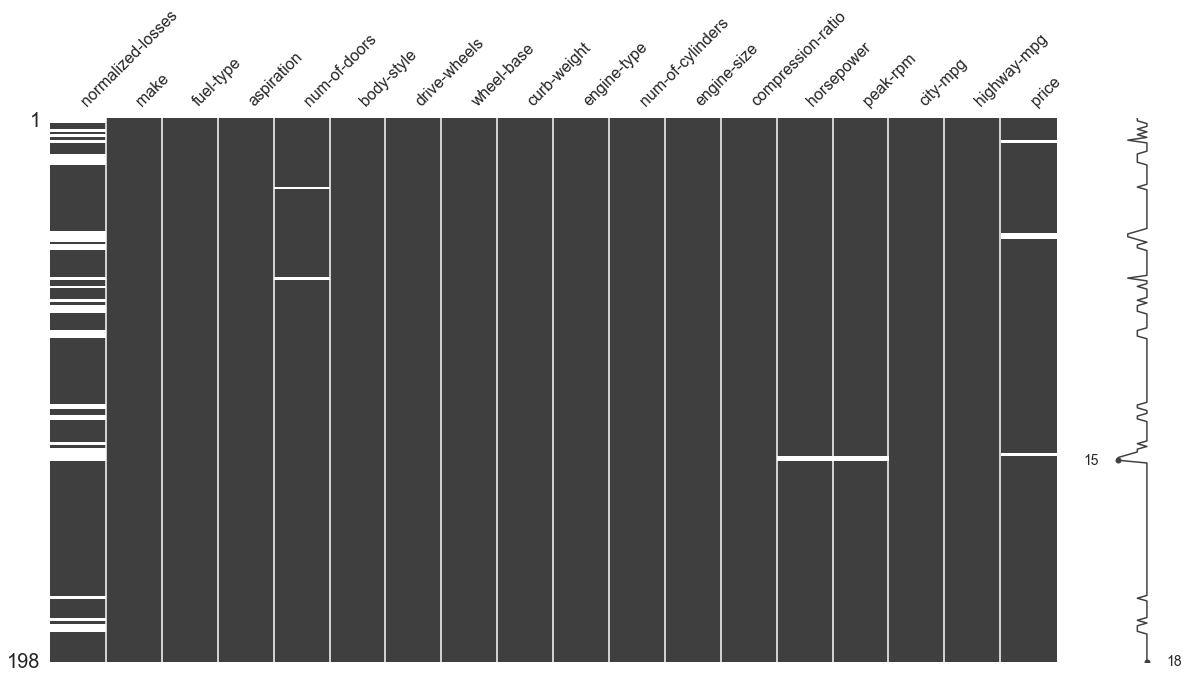

In [17]:
# graphical representation of missing data
missingno.matrix(df, figsize=(20,10))

In [18]:
# get the number of any missing data
missing_values_count = df.isnull().sum()

missing_values_count

normalized-losses    39
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
wheel-base            0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [19]:
# check total misisng values
total_cells = np.product(df.shape)

# get number of missing data
total_missing = missing_values_count.sum()

# total % missing
round((total_missing/total_cells)*100, 4)

1.3749

Only 1.38% of the data is missing. Lets see if we can use the 'Normalized-losses' columnsince from the matrix, we can see quite a bit missing

In [20]:
# check total misisng values
total_cells = np.product(df['normalized-losses'].shape)

# get number of missing data
total_missing = missing_values_count.sum()

# total % missing
round((total_missing/total_cells)*100, 4)

24.7475

It so happens that about 24.75% of the columns data is missing

So will drop the 'normalized-losses' column for better distribution

In [21]:
df.drop('normalized-losses', inplace=True, axis=1)

In [22]:
df.head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,9.0,111,5000,21,27,13495
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,2823,ohcv,six,152,9.0,154,5000,19,26,16500


### Remove rows with missing data since there are just a few

In [23]:
df.dropna(subset = ['price', 'peak-rpm', 'horsepower', 'num-of-doors'], axis=0, inplace=True)

In [24]:
# get the number of any missing data
missing_values_count = df.isnull().sum()

missing_values_count

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
wheel-base           0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# 5. Change appropriate columns to numerical datatypes

In [25]:
df.dtypes

make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
wheel-base           float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [26]:
df.head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,9.0,111,5000,21,27,13495
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,2823,ohcv,six,152,9.0,154,5000,19,26,16500


We can see that horsepower, peak-rpm, and price are of object type and need to be convertedt o numerical datatype.

In [27]:
to_convert = ['horsepower', 'peak-rpm', 'price']

for item in range(len(to_convert)):
    column = to_convert[item]
    df[column] = pd.to_numeric(df[column])

In [28]:
df.dtypes

make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
wheel-base           float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

# 6. Data Distribution

In [29]:
# this gives the statistics of all numerical data in the dataframe
round(df.describe(),2)

,wheel-base,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,190.00,190.00,190.00,190.00,190.00,190.00,190.00,190.00,190.00
mean,98.95,2559.45,127.04,10.10,103.47,5116.32,25.21,30.65,13196.41
std,6.09,526.71,42.07,3.93,37.43,475.12,6.48,6.90,7988.68
min,86.60,1488.00,61.00,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,94.50,2145.00,97.25,8.50,70.00,4800.00,19.00,25.00,7747.25
50%,97.00,2414.00,110.50,9.00,95.00,5200.00,24.00,30.00,10246.50
75%,102.40,2947.75,144.00,9.40,116.00,5500.00,30.00,34.00,16502.25
max,120.90,4066.00,326.00,23.00,262.00,6600.00,49.00,54.00,45400.00


#### ========================================================
#    EDA (Exploratory Data Analysis)
#### ========================================================

The most important comlumn here is the price. So everything must be around the price concept.
So I beleive that we are basically asking here, "**What affects the price of cars**?"

In [30]:
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,2548,dohc,four,130,9.0,111,5000,21,27,13495
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,2823,ohcv,six,152,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,99.8,2337,ohc,four,109,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,99.4,2824,ohc,five,136,8.0,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,99.8,2507,ohc,five,136,8.5,110,5500,19,25,15250


In [31]:
# i like to make a copy of the dataframe to work with so as to not mess up the one i have alraedy set
auto = df

## Cylinders vs price

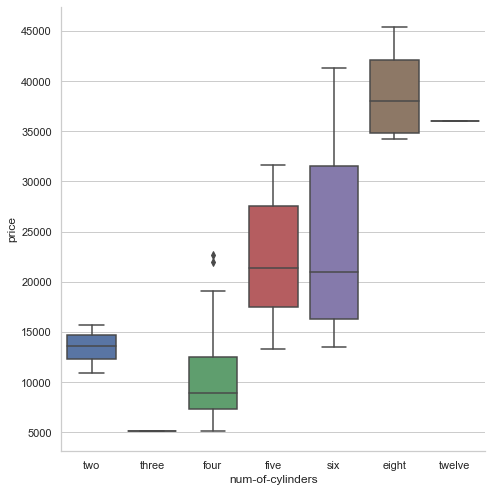

In [32]:
sns.catplot(x='num-of-cylinders', y='price', data=auto, kind='box', 
            order=['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'], height=7)

## Wheel base vs Price

Because of the effect the wheelbase has on the weight distribution of the vehicle, wheelbase dimensions are very important to the balance and steering. In high performance vehicles a longer wheelbase is more stable at higher speeds. A short wheelbase vehicle is usually able to corner faster but may be less aerodynamic

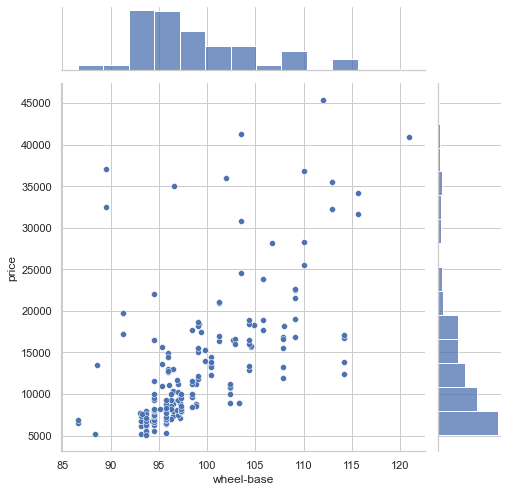

In [33]:
sns.jointplot(x='wheel-base', y='price', data=auto, height=7)

## Engine size vs price

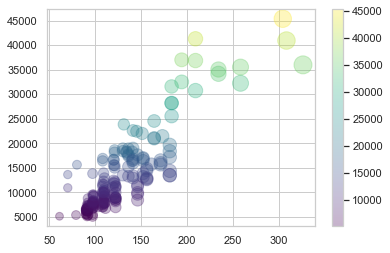

In [34]:
x = auto['engine-size']
y = auto['price']

colors = auto['price']
size = auto['engine-size']

plt.scatter(x, y, c = colors, s = size, alpha=0.3, cmap='viridis')
plt.colorbar()

## Drive wheels vs price

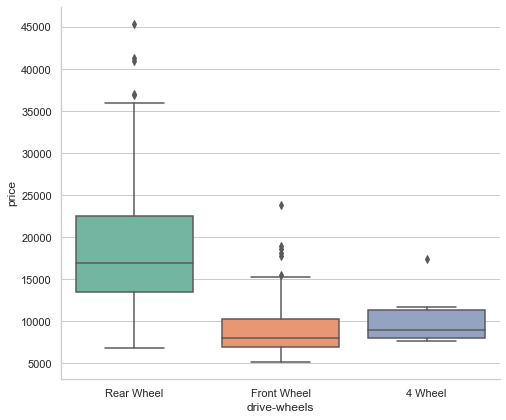

In [35]:
g = sns.catplot(x='drive-wheels', y='price', data = auto, kind='box', palette='Set2', height=6, aspect=1.2)

g.set_xticklabels(['Rear Wheel', 'Front Wheel','4 Wheel'])

## Body-style vs price

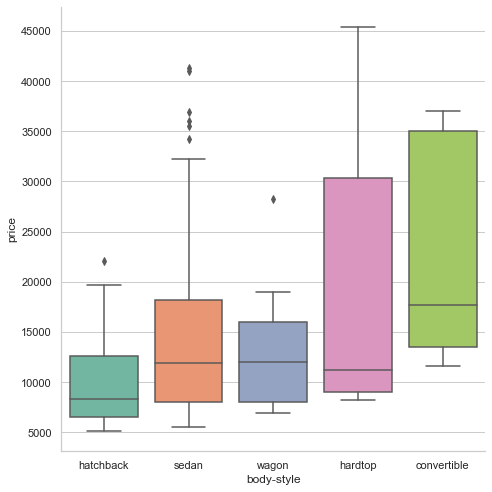

In [36]:
sns.catplot(x='body-style', y='price', data=auto.sort_values(by='price'), kind='box', height=7, 
            palette='Set2')

## Averages between the characteristics and Price

In [37]:
# get the averages of 'drive-wheels', 'engine-size', 'wheel-base', 'horsepower' and'price'
average = round(auto[['drive-wheels', 'engine-size', 'wheel-base', 'horsepower',
                      'price']].groupby('drive-wheels').mean(), 2)
average

,engine-size,wheel-base,horsepower,price
drive-wheels,,,,
4wd,107.50,96.49,87.25,10241.00
fwd,108.61,96.45,86.51,9224.25
rwd,158.06,103.13,131.82,19739.41


In [38]:
drive_style = auto[['drive-wheels', 'body-style', 'price']]

drive_style_grouped = round(drive_style.groupby(['drive-wheels', 'body-style'], as_index=False ).mean(), 2)

drive_style_grouped

,drive-wheels,body-style,price
0,4wd,hatchback,7603.00
1,4wd,sedan,12647.33
2,4wd,wagon,9095.75
3,fwd,convertible,11595.00
4,fwd,hardtop,8249.00
5,fwd,hatchback,8317.72
6,fwd,sedan,9851.80
7,fwd,wagon,10061.18
8,rwd,convertible,25812.00
9,rwd,hardtop,22565.17


In [39]:
# How to pivot table https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

new_table = drive_style_grouped.pivot(index='drive-wheels', columns='body-style')

# this table displays the cost of each body type by each drive wheel
new_table

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  NaN       NaN   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8317.72   9851.80  10061.18
rwd              25812.0  22565.17  14484.41  21819.31  16994.22

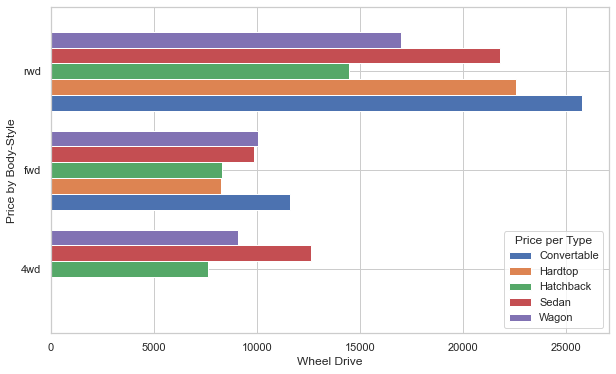

In [40]:
# Create the graph
index=['rw','fw','4w']
ax = new_table.plot.barh(figsize=(10,6), width=0.8)

# set the labels and titles
ax.set_xlabel('Wheel Drive')
ax.set_ylabel('Price by Body-Style')
ax.legend(['Convertable', 'Hardtop', 'Hatchback',
          'Sedan', 'Wagon'],title='Price per Type')